<a href="https://colab.research.google.com/github/jang-jinyeol/Machine_Learning/blob/main/Lasso_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
선형 회귀에 규제를 적용하는 데 Ridge의 대안으로 Lasso가 있다.
릿지 회귀에서와 같이 라쏘도 계수를 0에 가깝게 만들려고 한다.
이를 L1 규제라고 한다.
L1 규제의 결과로 라쏘를 사용할 때 어떤 계수는 정말 0이 된다.
일부 계수를 0으로 만들면 모델을 이해하기 쉬워지고 이 모델의 가장 중요한 특성이 무엇인지 드러내준다.
아래에서 확장된 보스턴 주택가격 데이터셋에 라쏘를 적용해본다.

SyntaxError: ignored

In [8]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [4]:
!pip install mglearn
import mglearn

In [5]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
import numpy as np
X, y = mglearn.datasets.load_extended_boston()

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(lasso.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(X_test,y_test)))
# Lasso도 계수를 얼마나 강하게 0으로 보낼지를 조절하는 alpha 매개변수를 지원한다 ( 기본 : alpha=1.0)
print("사용한 특성의 수: {}".format(np.sum(lasso.coef_ != 0)))
# 과소적합이며 104개의 특성 중 4개만 사용한 것을 볼 수 있다. 과소적합을 줄이기 위해 alpha 값을 줄여보겠다

훈련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성의 수: 4


In [6]:
from sklearn.linear_model import Ridge

ridge01 = Ridge(alpha=0.1).fit(X_train,y_train)

print("훈련 세트 점수: {:.2f}".format(ridge01.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge01.score(X_test,y_test)))
print("사용한 특성의 수: {}".format(np.sum(ridge01.coef_ != 0)))



훈련 세트 점수: 0.93
테스트 세트 점수: 0.77
사용한 특성의 수: 104


훈련 세트 점수: 0.90
테스트 세트 점수: 0.77
사용한 특성의 수: 33


훈련 세트 점수: 0.95
테스트 세트 점수: 0.64
사용한 특성의 수: 96


Text(0, 0.5, '계수 크기')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


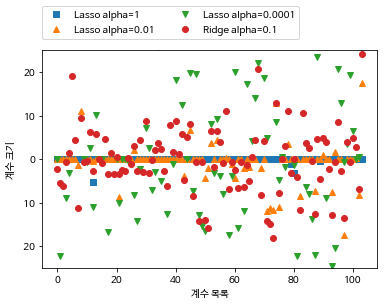

In [9]:
# 이렇게 하려면 max_iter(반복 실행하는 최대 횟수)의 기본값을 늘려야 한다.
#  Lasso는 L1, L2 규제를 함께 쓰는 엘라스틱넷(Elastic_Net) 방식에서 L2 규제가 빠진 것이다.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train,y_train)
print("훈련 세트 점수: {:.2f}".format(lasso001.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso001.score(X_test,y_test)))
print("사용한 특성의 수: {}".format(np.sum(lasso001.coef_ != 0)))

# Ridge보다 사용된 특성이 적어서 모델을 분석하기가 조금 더 쉽다.
# 사용된 특성은 104개 중 33개뿐이어서, 모델을 분석하기가 조금 더 쉽다.
# 그러나 alpha 값을 너무 낮추면 규제의 효과가 없어져 과대적합이 되므로 LinearRegression의 결과와 비슷해진다.

print('\n')

lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train,y_train)
print("훈련 세트 점수: {:.2f}".format(lasso00001.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso00001.score(X_test,y_test)))
print("사용한 특성의 수: {}".format(np.sum(lasso00001.coef_ != 0)))

# alpha 값이 다른 모델들의 계수를 그래프로 그려보았다.

import matplotlib.pyplot as plt
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")

plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_,'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))

plt.ylim(-25, 25)
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")


